In [2]:
import numpy as np
import pandas as pd
import random
import time
import timeit

random.seed(10)

## Generate 5 Arrays and Time the Sorts

In [3]:
np.random.seed(10)
start = time.perf_counter()
a = sorted(np.random.randint(0, 10000, 512))
end = time.perf_counter()
as_time = end-start
print(end-start)

np.random.seed(10)
start = time.perf_counter()
b = sorted(np.random.randint(0, 10000, 1024))
end = time.perf_counter()
bs_time = end-start
print(end-start)

np.random.seed(10)
start = time.perf_counter()
c = sorted(np.random.randint(0, 10000, 2048))
end = time.perf_counter()
cs_time = end-start
print(end-start)

np.random.seed(10)
start = time.perf_counter()
d = sorted(np.random.randint(0, 10000, 4096))
end = time.perf_counter()
ds_time = end-start
print(end-start)


np.random.seed(10)
start = time.perf_counter()
e = sorted(np.random.randint(0, 10000, 8192))
end = time.perf_counter()
es_time = end-start
print(end-start)

0.0001556999999987596
0.00023090000000003386
0.0006844000000008066
0.0017799000000007226
0.0024313999999989733


## Time Binary Search

### Finding last item in each list, which yields the max value

In [1]:
def binary_search(list, item):
    # low and high keep track of which part of the list you'll search in.
    low = 0
    high = len(list) - 1

    # While you haven't narrowed it down to one element ...
    while low <= high:
        
      # ... check the middle element
        mid = (low + high) // 2
        guess = list[mid]
      # Found the item.
        if guess == item:
            return mid
      # The guess was too high.
        if guess > item:
            high = mid - 1
      # The guess was too low.
        else:
            low = mid + 1

    # Item doesn't exist
    return None

In [5]:
start = time.perf_counter()
ab_result = binary_search(a, a[-1])
end = time.perf_counter()
ab_time = end-start
print(end-start)

3.740000000007626e-05


In [6]:
start = time.perf_counter()
bb_result = binary_search(b, b[-1])
end = time.perf_counter()
bb_time = end-start
print(end-start)

4.129999999946676e-05


In [7]:
start = time.perf_counter()
cb_result = binary_search(c, c[-1])
end = time.perf_counter()
cb_time = end-start
print(end-start)

3.700000000073089e-05


In [8]:
start = time.perf_counter()
db_result = binary_search(d, d[-1])
end = time.perf_counter()
db_time = end-start
print(end-start)

3.71999999995154e-05


In [9]:
start = time.perf_counter()
eb_result = binary_search(e, e[-1])
end = time.perf_counter()
eb_time = end-start
print(end-start)

4.020000000082291e-05


## Time Linear/Brute Force Search

In [10]:
def linear_search(mylist, item):
    i = 0
    while i < len(mylist): # why not use for loop through list?
        if mylist[i] == item:
            return i
        else:
            i = i + 1
    return None

In [11]:
start = time.perf_counter()
al_result = linear_search(a, a[-1])
end = time.perf_counter()
al_time = end-start
print(end-start)

0.0002712999999978649


In [12]:
start = time.perf_counter()
bl_result = linear_search(b, b[-1])
end = time.perf_counter()
bl_time = end-start
print(end-start)

0.0001677999999998292


In [13]:
start = time.perf_counter()
cl_result = linear_search(c, c[-1])
end = time.perf_counter()
cl_time = end-start
print(end-start)

0.0002881000000023448


In [14]:
start = time.perf_counter()
dl_result = linear_search(d, d[-1])
end = time.perf_counter()
dl_time = end-start
print(end-start)

0.0005877999999981398


In [15]:
start = time.perf_counter()
el_result = linear_search(e, e[-1])
end = time.perf_counter()
el_time = end-start
print(end-start)

0.001088899999999171


## Results Table

In [17]:
import pandas as pd

data = [['a', len(a), as_time, al_time, ab_time, ab_time + as_time],
       ['b', len(b), bs_time, bl_time, bb_time, bb_time + bs_time],
       ['c', len(c), cs_time, cl_time, cb_time, cb_time + cs_time],
       ['d', len(d), ds_time, dl_time, db_time, db_time + ds_time],
       ['e', len(e), es_time, el_time, eb_time, eb_time + es_time]]

df = pd.DataFrame(data, columns = ['Name','Array_len','Sort_Time','Lin_Time','Bin_Time','Sort+Bin_Time'])

In [18]:
df

,Name,Array_len,Sort_Time,Lin_Time,Bin_Time,Sort+Bin_Time
0,a,512,0.000156,0.000271,0.000037,0.000193
1,b,1024,0.000231,0.000168,0.000041,0.000272
2,c,2048,0.000684,0.000288,0.000037,0.000721
3,d,4096,0.001780,0.000588,0.000037,0.001817
4,e,8192,0.002431,0.001089,0.000040,0.002472


## Graphs

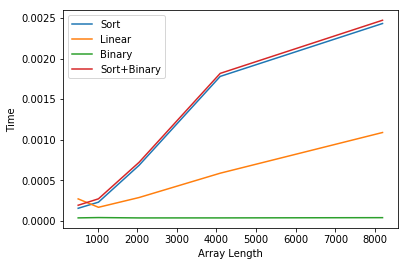

In [31]:
import matplotlib.pyplot as plt

plt.plot(df['Array_len'],df['Sort_Time'], label = "Sort")
plt.plot(df['Array_len'],df['Lin_Time'], label = "Linear")
plt.plot(df['Array_len'],df['Bin_Time'], label = "Binary")
plt.plot(df['Array_len'],df['Sort+Bin_Time'], label = "Sort+Binary")
plt.xlabel('Array Length')
plt.ylabel('Time')
plt.legend()



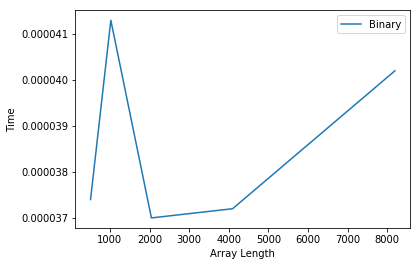

In [33]:
plt.plot(df['Array_len'],df['Bin_Time'], label = "Binary")
plt.xlabel('Array Length')
plt.ylabel('Time')
plt.legend()

<p>Even though my computer isn't perfect, you can see some clear trends that sorting takes the most timee. <br>Once the data is sorted, binary search performance is much better than the linear search.<br><br>If we kept creating larger arrays we would likely see more and more separation between the linear and binary sorts. <br>However, the sort algorithm in base python is nlog(n) which is worse than linear search.

## Conclusion

<p> The results seem to be within expectations of my understanding of time complexity.<br><br>Since Binary Search as O(log(n)) complexity, we see extremely good times compared to the linear search algorithm <br>which clearly shows a linear trend on our graph due to the O(n) time complexity.  This clearly wouldn't scale well.<br><br>However, our binary search requires the data to be sorted in order to work.  Unfortunately, the sort is costly as can be seen on the graph. Therefore, it would be wise to keep our data sorted at time of data ingestion and if we needed to search for a specific value, we could retrieve results extremely fast.  The sorting algorithm in python has O(nlog(n)) time complexity which scales worse than the linear search algorithm so this is why we'd want to do it up front.<br><br>I made another graph for the binary search times in order to see more details but the results aren't very meaningful. <br>Due to other processes running on my computer, each run will be slightly different and you won't see a logarithmic line. <br>However, the performance is still very good and the extremely small volatility can be ignored.